In [1]:
import librosa, glob, sys, json, pickle, os, random
from tqdm import tqdm
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
def _write(file_path, items):
    print(file_path, len(items))
    with open(file_path, 'w') as f:
        for item in items:
            json.dump(item, f)
            f.write('\n')

In [ ]:
accents = ['african', 'indian', 'hongkong', 'philippines', 
           'england', 'scotland', 'ireland', 'australia', 
           'canada', 'us', 
           'bermuda', 'southatlandtic', 'wales', 'malaysia']
# afr, eng, hk, ind, ire, phil, sco, us
classifier_samples = ['african', 'indian', 'hongkong', 'philippines', 'england', 'scotland', 'ireland', 'us']
for ind, accent in enumerate(accents):
    file_path = '{}.json'.format(accent)
    json_lst = [json.loads(line.strip()) for line in open(file_path)]
    classifier_dump = 'classifier-train/{}.json'.format(accent)
    ground_dump = 'ground/{}.json'.format(accent)
    if accent not in classifier_samples:
        _write(ground_dump, json_lst)
        continue
    group_json_dct = {}
    for json_item in json_lst:
        group_json_dct.setdefault(json_item["client_id"], []).append(json_item)
    group_json_lst = group_json_dct.values()
    print(f"{accent} -- total samples: {len(json_lst)}, num speakers: {len(group_json_lst)}")

    speaker_counts = []
    for key in group_json_dct.keys():
        speaker_counts.append(len(group_json_dct[key]))

    speaker_counts.sort(reverse=True)

    plt.figure(ind)
    
    plt.plot(speaker_counts)

    # plt.yscale("log")

    plt.show()
    # group_json_lst = sorted(group_json_lst, key=lambda d: -len(d))
    # odd_json_lst =  group_json_lst[::2]
    # odd_json_lst = [x for xs in odd_json_lst for x in xs]
    # even_json_lst =  group_json_lst[1::2]
    # even_json_lst = [x for xs in even_json_lst for x in xs]
    # _write(classifier_dump, odd_json_lst)
    # _write(ground_dump, even_json_lst)

In [6]:
l = [{1:'a', 2:"ab"}, {1:'b', 2:"ab"}, {1:'b', 2:"ab"}, {1:'a', 2:"ab"}, {1:'c', 2:"ab"}, {1:'a', 2:"ab"}]
d = {}
for x in l:
    d.setdefault(x[1], []).append(x)
print(d)
newlist = sorted(d.values(), key=lambda d: -len(d)) 
print(newlist)

{'a': [{1: 'a', 2: 'ab'}, {1: 'a', 2: 'ab'}, {1: 'a', 2: 'ab'}], 'b': [{1: 'b', 2: 'ab'}, {1: 'b', 2: 'ab'}], 'c': [{1: 'c', 2: 'ab'}]}
[[{1: 'a', 2: 'ab'}, {1: 'a', 2: 'ab'}, {1: 'a', 2: 'ab'}], [{1: 'b', 2: 'ab'}, {1: 'b', 2: 'ab'}], [{1: 'c', 2: 'ab'}]]


african -- total samples: 8066, num speakers: 229


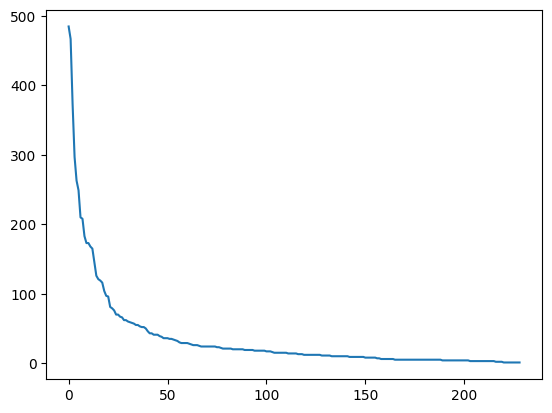

indian -- total samples: 73030, num speakers: 1794


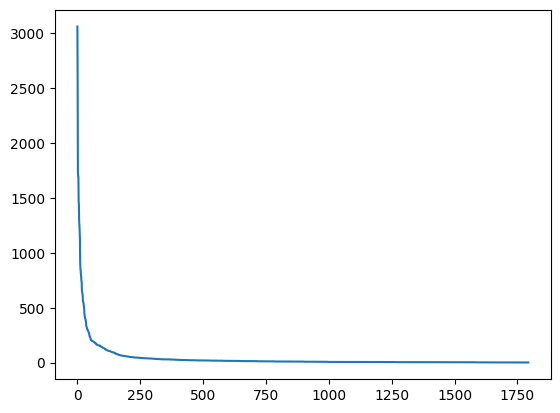

hongkong -- total samples: 2750, num speakers: 111


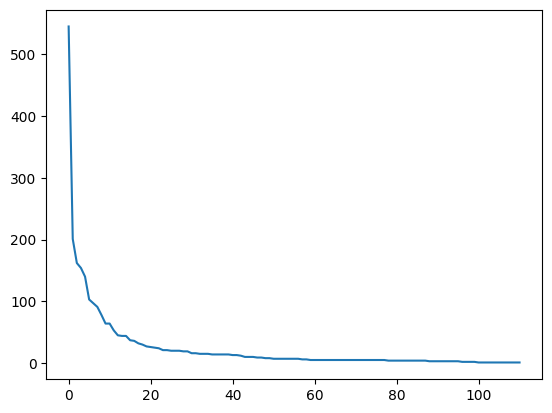

philippines -- total samples: 4158, num speakers: 108


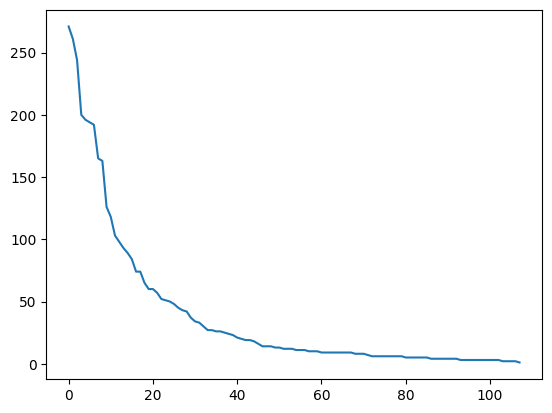

england -- total samples: 118401, num speakers: 2054


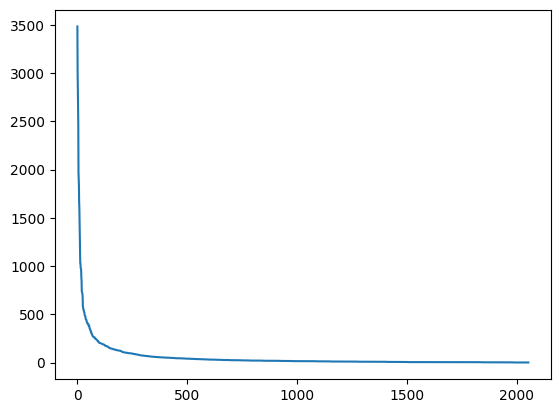

scotland -- total samples: 12676, num speakers: 155


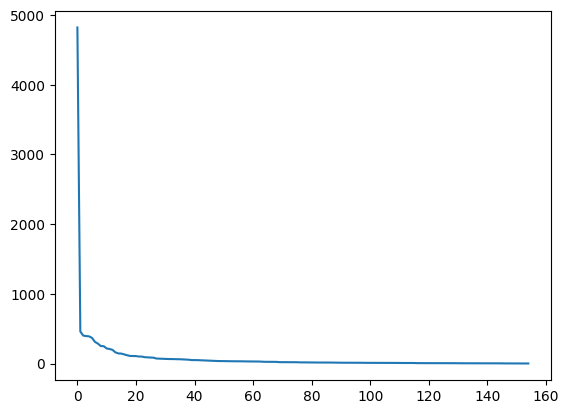

ireland -- total samples: 9233, num speakers: 173


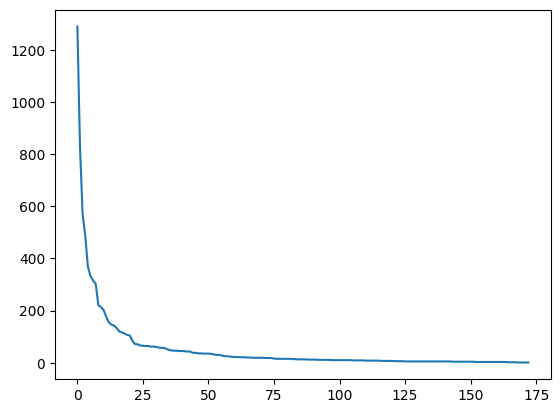

australia -- total samples: 46951, num speakers: 596


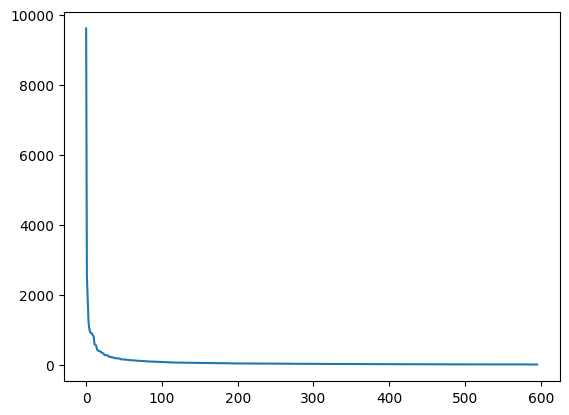

canada -- total samples: 48453, num speakers: 791


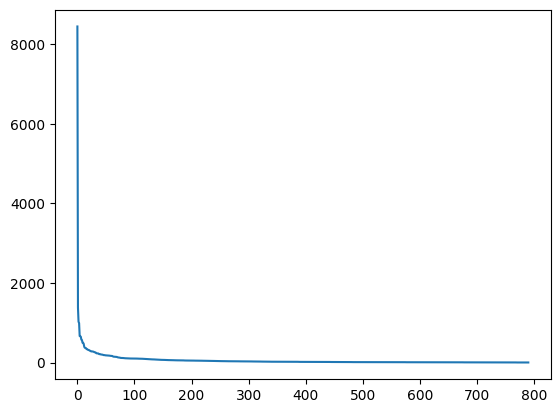

us -- total samples: 351472, num speakers: 6644


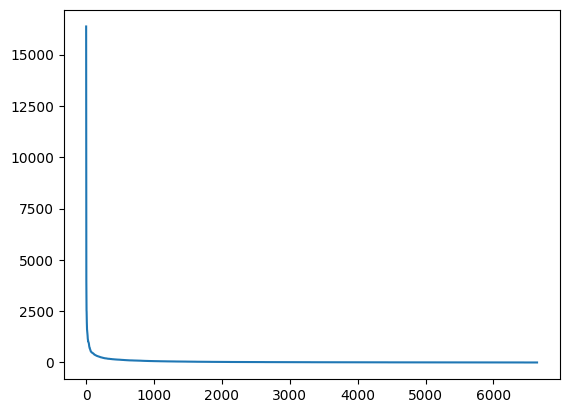

bermuda -- total samples: 643, num speakers: 41


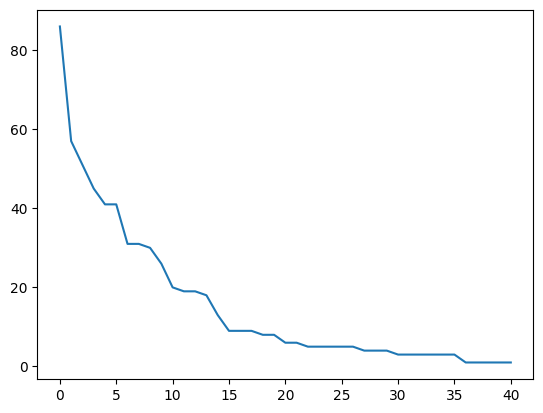

southatlandtic -- total samples: 203, num speakers: 5


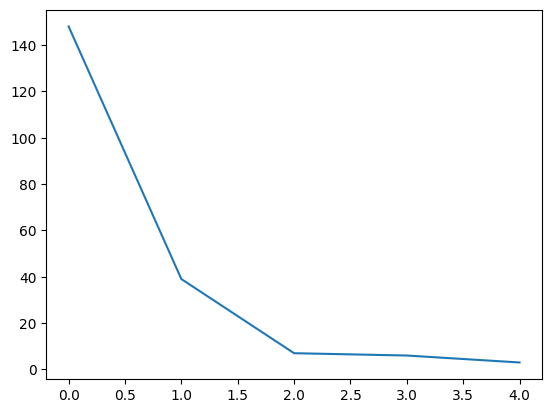

wales -- total samples: 1550, num speakers: 61


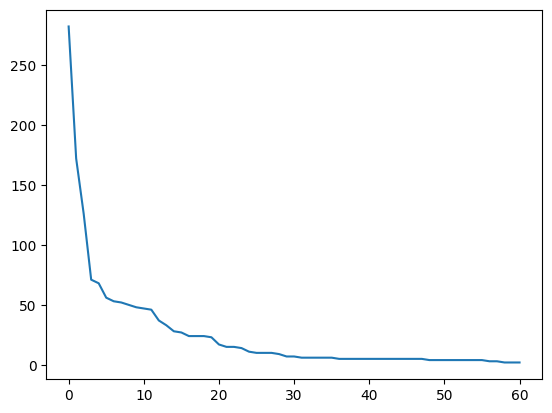

malaysia -- total samples: 1685, num speakers: 81


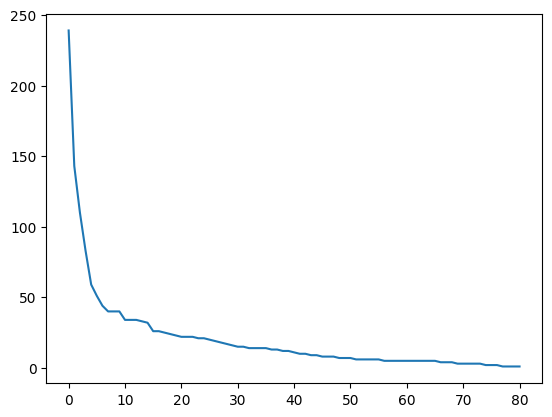

In [7]:
accents = ['african', 'indian', 'hongkong', 'philippines', 
           'england', 'scotland', 'ireland', 'australia', 
           'canada', 'us', 
           'bermuda', 'southatlandtic', 'wales', 'malaysia']
# afr, eng, hk, ind, ire, phil, sco, us
classifier_samples = ['african', 'indian', 'hongkong', 'philippines', 'england', 'scotland', 'ireland', 'us']
for ind, accent in enumerate(accents):
    file_path = '{}.json'.format(accent)
    json_lst = [json.loads(line.strip()) for line in open(file_path)]
    classifier_dump = 'classifier-train/{}.json'.format(accent)
    ground_dump = 'ground/{}.json'.format(accent)
    # if accent not in classifier_samples:
    #     _write(ground_dump, json_lst)
    #     continue
    group_json_dct = {}
    for json_item in json_lst:
        group_json_dct.setdefault(json_item["client_id"], []).append(json_item)
    group_json_lst = group_json_dct.values()
    print(f"{accent} -- total samples: {len(json_lst)}, num speakers: {len(group_json_lst)}")

    speaker_counts = []
    for key in group_json_dct.keys():
        speaker_counts.append(len(group_json_dct[key]))

    speaker_counts.sort(reverse=True)

    plt.figure(ind)
    
    plt.plot(speaker_counts)

    # plt.yscale("log")

    plt.show()
    # group_json_lst = sorted(group_json_lst, key=lambda d: -len(d))
    # odd_json_lst =  group_json_lst[::2]
    # odd_json_lst = [x for xs in odd_json_lst for x in xs]
    # even_json_lst =  group_json_lst[1::2]
    # even_json_lst = [x for xs in even_json_lst for x in xs]
    # _write(classifier_dump, odd_json_lst)
    # _write(ground_dump, even_json_lst)